# Original Data:

In [310]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import datetime

df=pd.read_csv('appstore_games.csv')
games=df

In [311]:
df.head()

,URL,ID,Name,Subtitle,Icon URL,Average User Rating,User Rating Count,Price,In-app Purchases,Description,Developer,Age Rating,Languages,Size,Primary Genre,Genres,Original Release Date,Current Version Release Date
0,https://apps.apple.com/us/app/sudoku/id284921427,284921427,Sudoku,NaN,https://is2-ssl.mzstatic.com/image/thumb/Purpl...,4.0,3553.0,2.99,NaN,"Join over 21,000,000 of our fans and download ...",Mighty Mighty Good Games,4+,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...",15853568.0,Games,"Games, Strategy, Puzzle",11/07/2008,30/05/2017
1,https://apps.apple.com/us/app/reversi/id284926400,284926400,Reversi,NaN,https://is4-ssl.mzstatic.com/image/thumb/Purpl...,3.5,284.0,1.99,NaN,"The classic game of Reversi, also known as Oth...",Kiss The Machine,4+,EN,12328960.0,Games,"Games, Strategy, Board",11/07/2008,17/05/2018
2,https://apps.apple.com/us/app/morocco/id284946595,284946595,Morocco,NaN,https://is5-ssl.mzstatic.com/image/thumb/Purpl...,3.0,8376.0,0.00,NaN,Play the classic strategy game Othello (also k...,Bayou Games,4+,EN,674816.0,Games,"Games, Board, Strategy",11/07/2008,5/09/2017
3,https://apps.apple.com/us/app/sudoku-free/id28...,285755462,Sudoku (Free),NaN,https://is3-ssl.mzstatic.com/image/thumb/Purpl...,3.5,190394.0,0.00,NaN,"Top 100 free app for over a year.\nRated ""Best...",Mighty Mighty Good Games,4+,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...",21552128.0,Games,"Games, Strategy, Puzzle",23/07/2008,30/05/2017
4,https://apps.apple.com/us/app/senet-deluxe/id2...,285831220,Senet Deluxe,NaN,https://is1-ssl.mzstatic.com/image/thumb/Purpl...,3.5,28.0,2.99,NaN,"""Senet Deluxe - The Ancient Game of Life and A...",RoGame Software,4+,"DA, NL, EN, FR, DE, EL, IT, JA, KO, NO, PT, RU...",34689024.0,Games,"Games, Strategy, Board, Education",18/07/2008,22/07/2018


In [313]:
df.isnull().sum()

URL                                 0
ID                                  0
Name                                0
Subtitle                        11746
Icon URL                            0
Average User Rating              9446
User Rating Count                9446
Price                              24
In-app Purchases                 9324
Description                         0
Developer                           0
Age Rating                          0
Languages                          60
Size                                1
Primary Genre                       0
Genres                              0
Original Release Date               0
Current Version Release Date        0
dtype: int64

In [314]:
df.describe()

,ID,Average User Rating,User Rating Count,Price,Size
count,1.700700e+04,7561.000000,7.561000e+03,16983.000000,1.700600e+04
mean,1.059614e+09,4.060905,3.306531e+03,0.813419,1.157064e+08
std,2.999676e+08,0.751428,4.232256e+04,7.835732,2.036477e+08
min,2.849214e+08,1.000000,5.000000e+00,0.000000,5.132800e+04
25%,8.996543e+08,3.500000,1.200000e+01,0.000000,2.295014e+07
50%,1.112286e+09,4.500000,4.600000e+01,0.000000,5.676895e+07
75%,1.286983e+09,4.500000,3.090000e+02,0.000000,1.330271e+08
max,1.475077e+09,5.000000,3.032734e+06,179.990000,4.005591e+09


# Data Cleaning:

In [315]:
#Remove rows with 'User Rating Count' = 0
#Remove Games that did not receive an Update from 6 months

df1=games.copy()
df1=df1[pd.notnull(df1['User Rating Count'])]

df1['Original Release Date']=pd.to_datetime(df1['Original Release Date'])
df1['Current Version Release Date']=pd.to_datetime(df['Current Version Release Date'])

df1['New_Update_Gap']=df1['Current Version Release Date']-df1['Original Release Date']

old_versions=df1[df1.New_Update_Gap < datetime.timedelta(days=180)].index

df1.drop(old_versions,inplace=True)

In [316]:
#Removing 'Games','Entertainment','Strategy' categories from the 'Genres' column as they appear in every row & hence are of no use.

df2=df1.copy()
df2['Genres']=df2['Genres'].str.replace('Games','').str.replace('Strategy','').str.replace('Entertainment','').str.replace(',','')


In [317]:
#Clubbing Genres as:

#Puzzle,Trivia ==> Puzzle
#Board,Card,Casino ==> Board
#Adventure,Role Playing,Simulation ==>Adventure
#Sports ==> Sports
#Action ==> Action
#Family,Education ==> Family

non_main_genres=df2[~df2.Genres.str.contains('Puzzle') & \
                    ~df2.Genres.str.contains('Action') & \
                    ~df2.Genres.str.contains('Family') & \
                    ~df2.Genres.str.contains('Education') & \
                    ~df2.Genres.str.contains('Adventure') & \
                    ~df2.Genres.str.contains('Role') & \
                    ~df2.Genres.str.contains('Board') & \
                    ~df2.Genres.str.contains('Role Playing') & \
                    ~df2.Genres.str.contains('Sports') & \
                    ~df2.Genres.str.contains('Simulation') & \
                    ~df2.Genres.str.contains('Trivia') & \
                    ~df2.Genres.str.contains('Card') & \
                    ~df2.Genres.str.contains('Casino')].index
df2.drop(non_main_genres, inplace=True)

df2.loc[df2['Genres'].str.contains('Puzzle'),'Genres']='Puzzle'
df2.loc[df2['Genres'].str.contains('Trivia'),'Genres']='Puzzle'
df2.loc[df2['Genres'].str.contains('Board'),'Genres']='Board'
df2.loc[df2['Genres'].str.contains('Card'),'Genres']='Board'
df2.loc[df2['Genres'].str.contains('Casino'),'Genres']='Board'
df2.loc[df2['Genres'].str.contains('Adventure'),'Genres']='Adventure'
df2.loc[df2['Genres'].str.contains('Role Playing'),'Genres']='Adventure'
df2.loc[df2['Genres'].str.contains('Role'),'Genres']='Adventure'
df2.loc[df2['Genres'].str.contains('Simulation'),'Genres']='Adventure'
df2.loc[df2['Genres'].str.contains('Sports'),'Genres']='Sports'
df2.loc[df2['Genres'].str.contains('Action'),'Genres']='Action'
df2.loc[df2['Genres'].str.contains('Family'),'Genres']='Family'
df2.loc[df2['Genres'].str.contains('Education'),'Genres']='Family'



# Game Count:

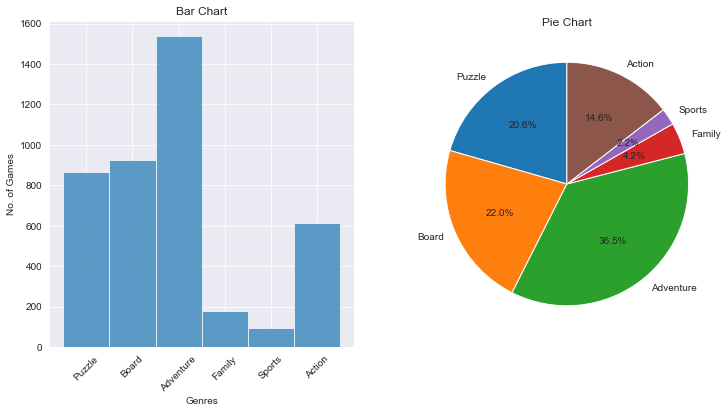

In [318]:
sns.set_style('darkgrid')

genre_label=['Puzzle','Board','Adventure','Family','Sports','Action']
genre_count=[df2.Genres[(df2['Genres']=='Puzzle')].count(),df2.Genres[(df2['Genres']=='Board')].count(),df2.Genres[(df2['Genres']=='Adventure')].count(),\
  df2.Genres[(df2['Genres']=='Family')].count(),df2.Genres[(df2['Genres']=='Sports')].count(),df2.Genres[(df2['Genres']=='Action')].count()]

plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
plt.bar(genre_label,genre_count,align='center',alpha=0.7,width=1)
plt.xticks(rotation=45)
plt.ylabel('No. of Games')
plt.xlabel('Genres')
plt.title('Bar Chart')

plt.subplot(1,2,2)
plt.pie(genre_count,labels=genre_label,startangle=90,autopct='%.1f%%')
plt.title('Pie Chart')
plt.show()

# User Ratings:

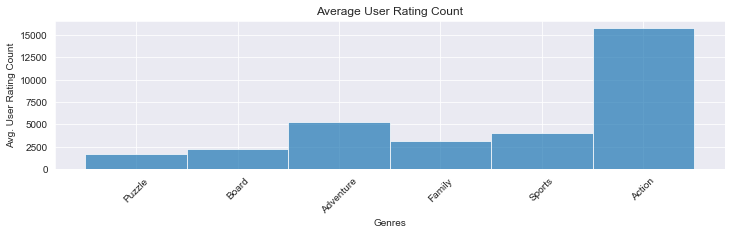

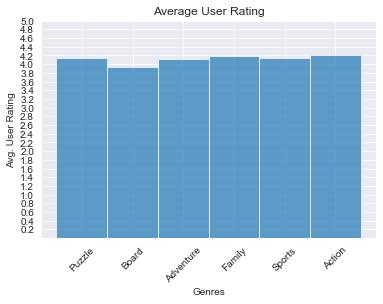

In [319]:
gnr_puzzle=df2['Genres']=='Puzzle'
gnr_board=df2['Genres']=='Board'
gnr_adventure=df2['Genres']=='Adventure'
gnr_family=df2['Genres']=='Family'
gnr_sports=df2['Genres']=='Sports'
gnr_action=df2['Genres']=='Action'

mean_user_ratings_cnt=[df2.loc[gnr_puzzle,'User Rating Count'].mean(),df2.loc[gnr_board,'User Rating Count'].mean(),\
                  df2.loc[gnr_adventure,'User Rating Count'].mean(),df2.loc[gnr_family,'User Rating Count'].mean(),\
                  df2.loc[gnr_sports,'User Rating Count'].mean(),df2.loc[gnr_action,'User Rating Count'].mean()]

mean_user_ratings=[df2.loc[gnr_puzzle,'Average User Rating'].mean(),df2.loc[gnr_board,'Average User Rating'].mean(),\
                  df2.loc[gnr_adventure,'Average User Rating'].mean(),df2.loc[gnr_family,'Average User Rating'].mean(),\
                  df2.loc[gnr_sports,'Average User Rating'].mean(),df2.loc[gnr_action,'Average User Rating'].mean()]


plt.figure(figsize=(12,6))

plt.subplot(2,1,1)
plt.bar(genre_label,mean_user_ratings_cnt,align='center',alpha=0.7,width=1)
plt.xticks(rotation=45)
plt.ylabel('Avg. User Rating Count')
plt.xlabel('Genres')
plt.title('Average User Rating Count')
plt.show()

plt.subplot(2,1,2)
axes= plt.axes()
plt.bar(genre_label,mean_user_ratings,align='center',alpha=0.7,width=1)
plt.xticks(rotation=45)
axes.set_yticks([0.2,0.4,0.6,0.8,1,1.2,1.4,1.6,1.8,2,2.2,2.4,2.6,2.8,3,3.2,3.4,3.6,3.8,4,4.2,4.4,4.6,4.8,5])
plt.ylabel('Avg. User Rating')
plt.xlabel('Genres')
plt.title('Average User Rating')
plt.show()

# Game Size:

[Text(0, 0.5, 'No. of Games'), Text(0.5, 0, 'Game size in MB')]

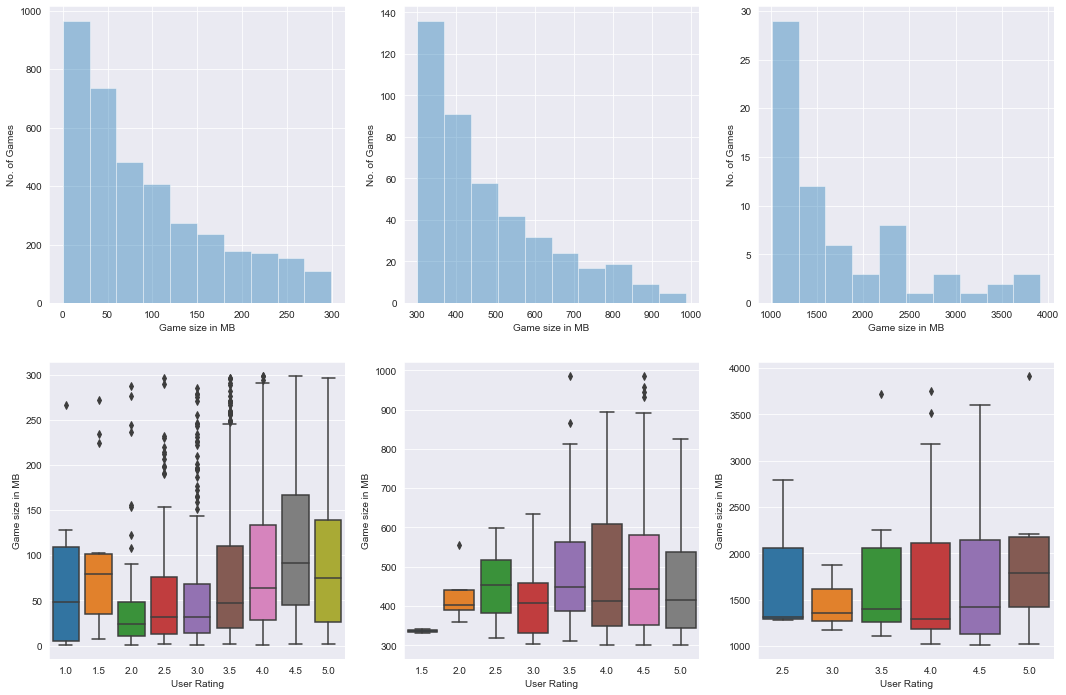

In [320]:
df2['Size_in_mb']=round(df2['Size']/1000000,1)
size_less_300mb =df2[df2.Size_in_mb<300]
size_more_300mb =df2[(df2.Size_in_mb>=300) & (df2.Size_in_mb<1000)]
size_more_1gb = df2[df2.Size_in_mb>=1000]

sns.set_style('darkgrid')
f,axes = plt.subplots(2,3, figsize=(18,12))

box1=sns.boxplot(data = size_less_300mb,x='Average User Rating',y='Size_in_mb',ax=axes[1,0])
box2=sns.boxplot(data = size_more_300mb,x='Average User Rating',y='Size_in_mb',ax=axes[1,1])
box3=sns.boxplot(data = size_more_1gb,x='Average User Rating',y='Size_in_mb',ax=axes[1,2])

box1.set(xlabel='User Rating',ylabel='Game size in MB')
box2.set(xlabel='User Rating',ylabel='Game size in MB')
box3.set(xlabel='User Rating',ylabel='Game size in MB')

dis1=sns.distplot(size_less_300mb.Size_in_mb,bins=10,kde=False,ax=axes[0,0])
dis2=sns.distplot(size_more_300mb.Size_in_mb,bins=10,kde=False,ax=axes[0,1])
dis3=sns.distplot(size_more_1gb.Size_in_mb,bins=10,kde=False,ax=axes[0,2])

dis1.set(xlabel='Game size in MB',ylabel='No. of Games')
dis2.set(xlabel='Game size in MB',ylabel='No. of Games')
dis3.set(xlabel='Game size in MB',ylabel='No. of Games')


# Paid Games:

[Text(0, 0.5, 'No. of Games'), Text(0.5, 0, 'Game Price in $')]

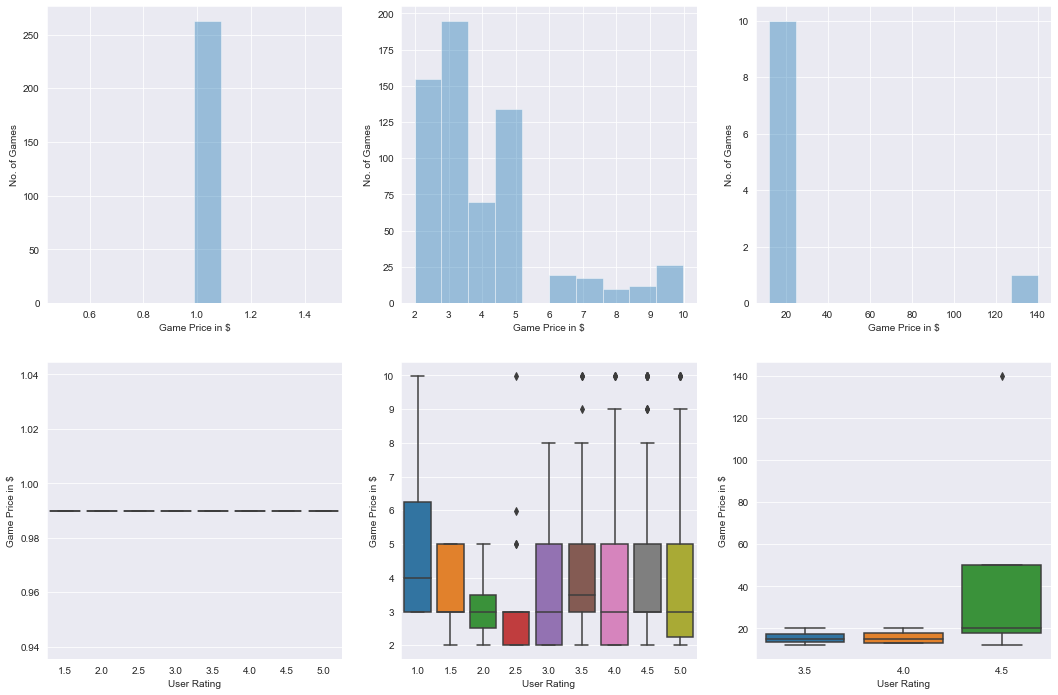

In [321]:
price_less_1=df2[(df2.Price>0) & (df2.Price<=1)]
price_less_10=df2[(df2.Price>1) & (df2.Price<=10)]
price_more_10=df2[df2.Price>10]

sns.set_style('darkgrid')
f,axes = plt.subplots(2,3, figsize=(18,12))

box4=sns.boxplot(data = price_less_1,x='Average User Rating',y='Price',ax=axes[1,0])
box5=sns.boxplot(data = price_less_10,x='Average User Rating',y='Price',ax=axes[1,1])
box6=sns.boxplot(data = price_more_10,x='Average User Rating',y='Price',ax=axes[1,2])

box4.set(xlabel='User Rating',ylabel='Game Price in $')
box5.set(xlabel='User Rating',ylabel='Game Price in $')
box6.set(xlabel='User Rating',ylabel='Game Price in $')

dis4=sns.distplot(price_less_1.Price,bins=10,kde=False,ax=axes[0,0])
dis5=sns.distplot(price_less_10.Price,bins=10,kde=False,ax=axes[0,1])
dis6=sns.distplot(price_more_10.Price,bins=10,kde=False,ax=axes[0,2])

dis4.set(xlabel='Game Price in $',ylabel='No. of Games')
dis5.set(xlabel='Game Price in $',ylabel='No. of Games')
dis6.set(xlabel='Game Price in $',ylabel='No. of Games')

# Conclusion: